<a href="https://colab.research.google.com/github/SyedIzzatUllah/Genetic-Algorithm/blob/main/Genetic_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Genetic Algorithm

The Genetic Algorithm is a stochastic global search optimization algorithm.<br>
The algorithm uses analogs of a genetic representation (bitstrings), fitness (function evaluations), genetic recombination (crossover of bitstrings), and mutation (flipping bits).<br>

The algorithm works by first creating a population of a fixed size of random bitstrings. The main loop of the algorithm is repeated for a fixed number of iterations or until no further improvement is seen in the best solution over a given number of iterations.<br>

One iteration of the algorithm is like an evolutionary generation.<br>

First, the population of bitstrings (candidate solutions) are evaluated using the objective function. The objective function evaluation for each candidate solution is taken as the fitness of the solution, which may be minimized or maximized.<br>

Then, parents are selected based on their fitness. A given candidate solution may be used as parent zero or more times. A simple and effective approach to selection involves drawing k candidates from the population randomly and selecting the member from the group with the best fitness. This is called tournament selection where k is a hyperparameter and set to a value such as 3. This simple approach simulates a more costly fitness-proportionate selection scheme.

**implement different strategies of followinng GA methos:**

### Parents selection and cross-over

Parents are used as the basis for generating the next generation of candidate points and one parent for each position in the population is required.<br>

Parents are then taken in pairs and used to create two children. Recombination is performed using a crossover operator. This involves selecting a random split point on the bit string, then creating a child with the bits up to the split point from the first parent and from the split point to the end of the string from the second parent. This process is then inverted for the second child.<br>

For example the two parents:<br>

- parent1 = 00000
- parent2 = 11111<br>
May result in two cross-over children:<br>

1. child1 = 00011
2. child2 = 11100
This is called one _point crossover_, and there are many other variations of the operator.

Crossover is applied probabilistically for each pair of parents, meaning that in some cases, copies of the parents are taken as the children instead of the recombination operator. Crossover is controlled by a hyperparameter set to a large value, such as 80 percent or 90 percent.<br>
<font color=blue>_"Crossover is the Genetic Algorithm’s distinguishing feature. It involves mixing and matching parts of two parents to form children. How you do that mixing and matching depends on the representation of the individuals."_</fot>

### Mutation

Mutation involves flipping bits in created children candidate solutions. Typically, the mutation rate is set to $\frac{1}{L}$, where $L$ is the length of the bitstring.<br>

<font color=blue>_"Each bit in a binary-valued chromosome typically has a small probability of being flipped. For a chromosome with $m$ bits, this mutation rate is typically set to $\frac{1}{m}$, yielding an average of one mutation per child chromosome."_</font><br>
For example, if a problem used a bitstring with 20 bits, then a good default mutation rate would be (1/20) = 0.05 or a probability of 5 percent.<br>

This defines the simple genetic algorithm procedure. It is a large field of study, and there are many extensions to the algorithm.<br>

Now that we are familiar with the simple genetic algorithm procedure, let’s look at how we might implement it from scratch.<br>

## Genetic Algorithm From Scratch

In this section, we will develop an implementation of the genetic algorithm.

### Initialize Population

The first step is to create a population of random bitstrings. We could use boolean values True and False, string values "$0$" and "$1$", or integer values $0$ and $1$. __In this case, we will use integer values.__<br>

We can generate an array of integer values in a range using the <font color=blue>randint() function</font>, and we can specify the range as values starting at $0$ and less than $2$, e.g. $0$ or $1$. We will also represent a candidate solution as a list instead of a <font color=blue>NumPy</font> array to keep things simple.<br>

An initial population of random bitstring can be created as follows, where _“n_pop”_ is a hyperparameter that controls the population size and _“n_bits”_ is a hyperparameter that defines the number of bits in a single candidate solution:

In [ ]:
from numpy.random import randint
from numpy.random import rand
# initial population of random bitstring
n_bits=20
n_pop=100
pop = [randint(0, 2, n_bits).tolist() for _ in range(n_pop)]
print("Population Size %i, each candidate is %i bits string"%(len(pop),n_bits))

Population Size 100, each candidate is 20 bits string


### Define iterations

Next, we can enumerate over a fixed number of algorithm iterations, in this case, controlled by a hyperparameter named “n_iter“.

In [ ]:
...
# enumerate generations
    for gen in range(n_iter):
        ...

### Objective function

The first step in the algorithm iteration is to evaluate all candidate solutions.<br>

We will use a function named <font color=blue>_objective()_</font> as a generic objective function and call it to get a fitness score, which we will minimize. We have defined the fitness function <font color=blue>_onemax()_</font> that returns the negative sum of candidates bit

In [ ]:
# objective function
def onemax(x):
    return -sum(x)
# evaluate all candidates in the population
scores = [onemax(c) for c in pop]
print(scores)

[-10, -11, -5, -10, -12, -12, -12, -12, -12, -8, -11, -11, -9, -10, -10, -7, -12, -4, -9, -11, -9, -10, -11, -7, -10, -12, -12, -9, -9, -7, -12, -11, -12, -12, -14, -11, -6, -9, -13, -7, -10, -7, -10, -14, -14, -13, -10, -10, -5, -7, -7, -10, -10, -10, -8, -10, -10, -13, -9, -12, -11, -9, -11, -13, -10, -9, -8, -11, -8, -6, -9, -10, -8, -12, -10, -13, -10, -8, -15, -11, -13, -12, -7, -9, -8, -5, -9, -11, -11, -9, -11, -14, -10, -12, -10, -9, -9, -9, -9, -14]


### Tournament selection procedure

We can then select parents that will be used to create children.<br>

The tournament selection procedure can be implemented as a function that takes the population and returns one selected parent. The $k$ value is fixed at $3$ with a default argument, but you can experiment with different values if you like.

In [ ]:
# tournament selection
def selection(pop, scores, k=3):
    # first random selection
    selection_ix = randint(len(pop))
    for ix in randint(0, len(pop), k-1):
        # check if better (e.g. perform a tournament)
        if scores[ix] < scores[selection_ix]:
            selection_ix = ix
    return pop[selection_ix]

We can then call this function one time for each position in the population to create a list of parents.

In [ ]:
...
# select parents
selected = [selection(pop, scores) for _ in range(n_pop)]
#candidate=selection(pop,scores,k=3)
#print("Candidate selected after tornament\n",selected)
#print("The fitness value of the selected candidate is %i"%onemax(selected))

Candidate selected after tornament
 [[1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1], [1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0], [1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0], [0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1], [1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1], [1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1], [1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1], [1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1], [1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1], [0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0], [1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1], [0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0], [1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0], [0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1], [1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0], [1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,

### Create Next generation - crossover

We can then create the next generation.<br>

This first requires a function to perform crossover. This function will take two parents and the crossover rate. The crossover rate is a _hyperparameter_ that determines whether crossover is performed or not, and if not, the parents are copied into the next generation. It is a probability and typically has a large value close to $1.0$.

The <font color=blue>_crossover()_</font> function below implements crossover using a draw of a random number in the range $[0,1]$ to determine if crossover is performed, then selecting a valid split point if crossover is to be performed.

In [ ]:
# crossover two parents to create two children
def crossover(p1, p2, r_cross):
    # children are copies of parents by default
    c1, c2 = p1.copy(), p2.copy()
    # check for recombination
    if rand() < r_cross:
        # select crossover point that is not on the end of the string
        pt = randint(1, len(p1)-2)
        # perform crossover
        c1 = p1[:pt] + p2[pt:]
        c2 = p2[:pt] + p1[pt:]
    return [c1, c2]

### Mutation

We also need a function to perform mutation.<br>

This procedure simply flips bits with a low probability controlled by the “r_mut” hyperparameter.

In [ ]:
# mutation operator
def mutation(bitstring, r_mut):
    for i in range(len(bitstring)):
        # check for a mutation
        if rand() < r_mut:
            # flip the bit
            bitstring[i] = 1 - bitstring[i]


We can then loop over the list of parents and create a list of children to be used as the next generation, calling the crossover and mutation functions as needed.

In [ ]:
# crossover rate
r_cross = 0.9
# mutation rate
r_mut = 1.0 / float(n_bits)
# create the next generation
children = list()
for i in range(0, n_pop, 2):
    # get selected parents in pairs
    p1, p2 = selected[i], selected[i+1]
    # crossover and mutation
    for c in crossover(p1, p2, r_cross):
        # mutation
        mutation(c, r_mut)
        # store for next generation
        children.append(c)

In [ ]:
for c in children:
    print(c)

[1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0]
[1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1]
[1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1]
[1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1]
[1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1]
[1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1]
[1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0]
[1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0]
[0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1]
[1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0]
[0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1]
[1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1]
[0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0]
[1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0]
[0, 1, 1, 0, 0, 1, 1, 0,

We can tie all of this together into a function named <font color=blue>_genetic_algorithm()_</font> that takes the name of the objective function and the hyperparameters of the search, and returns the best solution found during the search.

In [ ]:
# genetic algorithm search of the one max optimization problem
from numpy.random import randint
from numpy.random import rand

# objective function
def onemax(x):
    return -sum(x)

# tournament selection
def selection(pop, scores, k=3):
    # first random selection
    selection_ix = randint(len(pop))
    for ix in randint(0, len(pop), k-1):
        # check if better (e.g. perform a tournament)
        if scores[ix] < scores[selection_ix]:
            selection_ix = ix
    return pop[selection_ix]

# crossover two parents to create two children
def crossover(p1, p2, r_cross):
    # children are copies of parents by default
    c1, c2 = p1.copy(), p2.copy()
    # check for recombination
    if rand() < r_cross:
        # select crossover point that is not on the end of the string
        pt = randint(1, len(p1)-2)
        # perform crossover
        c1 = p1[:pt] + p2[pt:]
        c2 = p2[:pt] + p1[pt:]
    return [c1, c2]

# mutation operator
def mutation(bitstring, r_mut):
    for i in range(len(bitstring)):
        # check for a mutation
        if rand() < r_mut:
            # flip the bit
            bitstring[i] = 1 - bitstring[i]

# genetic algorithm
def genetic_algorithm(objective, n_bits, n_iter, n_pop, r_cross, r_mut):
    # initial population of random bitstring
    pop = [randint(0, 2, n_bits).tolist() for _ in range(n_pop)]
    # keep track of best solution
    best, best_eval = 0, objective(pop[0])
    # enumerate generations
    for gen in range(n_iter):
        # evaluate all candidates in the population
        scores = [objective(c) for c in pop]
        # check for new best solution
        for i in range(n_pop):
            if scores[i] < best_eval:
                best, best_eval = pop[i], scores[i]
                print(">%d, new best f(%s) = %.3f" % (gen,  pop[i], scores[i]))
        # select parents
        selected = [selection(pop, scores) for _ in range(n_pop)]
        # create the next generation
        children = list()
        for i in range(0, n_pop, 2):
            # get selected parents in pairs
            p1, p2 = selected[i], selected[i+1]
            # crossover and mutation
            for c in crossover(p1, p2, r_cross):
                # mutation
                mutation(c, r_mut)
                # store for next generation
                children.append(c)
        # replace population
        pop = children
    return [best, best_eval]

# define the total iterations
n_iter = 100
# bits
n_bits = 20
# define the population size
n_pop = 100
# crossover rate
r_cross = 0.9
# mutation rate
r_mut = 1.0 / float(n_bits)
# perform the genetic algorithm search
best, score = genetic_algorithm(onemax, n_bits, n_iter, n_pop, r_cross, r_mut)
print('Done!')
print('f(%s) = %f' % (best, score))

>0, new best f([1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0]) = -12.000
>0, new best f([0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1]) = -13.000
>0, new best f([0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1]) = -14.000
>0, new best f([0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]) = -15.000
>1, new best f([0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]) = -16.000
>1, new best f([1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1]) = -17.000
>3, new best f([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1]) = -18.000
>5, new best f([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]) = -19.000
>6, new best f([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]) = -20.000
Done!
f([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]) = -20.000000


## Genetic Algorithm for Continuous Function Optimization

Optimizing the OneMax function is not very interesting; we are more likely to want to optimize a continuous function.

For example, we can define the $x^2$ minimization function that takes input variables and has an optima at $f(0, 0) = 0.0$.

In [ ]:
# objective function
def objective(x):
    return x[0]**2.0 + x[1]**2.0

We can minimize this function with a genetic algorithm.<br>

First, we must define the bounds of each input variable.

In [ ]:
...
# define range for input
bounds = [[-5.0, 5.0], [-5.0, 5.0]]

We will take the “n_bits” hyperparameter as a number of bits per input variable to the objective function and set it to 16 bits.

In [ ]:
...
# bits per variable
n_bits = 16

This means our actual bit string will have (16 * 2) = 32 bits, given the two input variables.<br>

We must update our mutation rate accordingly.

In [ ]:
...
# mutation rate
r_mut = 1.0 / (float(n_bits) * len(bounds))

Next, we need to ensure that the initial population creates random bitstrings that are large enough.

In [ ]:
...
# initial population of random bitstring
pop = [randint(0, 2, n_bits*len(bounds)).tolist() for _ in range(n_pop)]

Finally, we need to decode the bitstrings to numbers prior to evaluating each with the objective function.<br>

We can achieve this by first decoding each substring to an integer, then scaling the integer to the desired range. This will give a vector of values in the range that can then be provided to the objective function for evaluation.<br>

The <font color=blue>_decode()_</font> function below implements this, taking the bounds of the function, the number of bits per variable, and a bitstring as input and returns a list of decoded real values.

In [ ]:
# decode bitstring to numbers
def decode(bounds, n_bits, bitstring):
    decoded = list()
    largest = 2**n_bits
    for i in range(len(bounds)):
        # extract the substring
        start, end = i * n_bits, (i * n_bits)+n_bits
        substring = bitstring[start:end]
        # convert bitstring to a string of chars
        chars = ''.join([str(s) for s in substring])
        # convert string to integer
        integer = int(chars, 2)
        # scale integer to desired range
        value = bounds[i][0] + (integer/largest) * (bounds[i][1] - bounds[i][0])
        # store
        decoded.append(value)
    return decoded
#print(decode)

We can then call this at the beginning of the algorithm loop to decode the population, then evaluate the decoded version of the population.

In [ ]:
...
# decode population
decoded = [decode(bounds, n_bits, p) for p in pop]
# evaluate all candidates in the population
scores = [objective(d) for d in decoded]
print(scores)

[27.825303375720978, 37.703939829953015, 20.960563886910677, 30.15080476179719, 23.90741773415357, 5.5245081428438425, 16.854086611419916, 18.520651967264712, 2.1598715567961335, 13.439960428513587, 11.358116753399372, 10.72919936850667, 10.913364519365132, 8.2753193564713, 4.06878599897027, 12.778898933902383, 10.363361099734902, 1.3507914263755083, 11.031115823425353, 2.1569253178313375, 34.18297786265612, 20.60241075232625, 19.317429629154503, 1.0402495274320245, 13.854012568481266, 25.163636077195406, 7.643244345672429, 25.728287640959024, 15.120432921685278, 3.811270766891539, 15.653186477720737, 1.4630279736593366, 0.8228752994909883, 7.145156059414148, 41.131905652582645, 26.12355323508382, 11.057733604684472, 22.756455093622208, 15.823567286133766, 10.152335930615664, 14.675426227040589, 12.470309459604323, 25.360547238960862, 40.521309012547135, 4.1235231794416904, 22.84355112351477, 4.0471210377290845, 15.054767671972513, 28.70281720533967, 1.008859509602189, 19.4492799462750

Tying this together, the complete example of the genetic algorithm for continuous function optimization is listed below.

In [ ]:
# genetic algorithm search for continuous function optimization
from numpy.random import randint
from numpy.random import rand

# objective function
def objective(x):
    return x[0]**2.0 + x[1]**2.0

# decode bitstring to numbers
def decode(bounds, n_bits, bitstring):
    decoded = list()
    largest = 2**n_bits
    for i in range(len(bounds)):
        # extract the substring
        start, end = i * n_bits, (i * n_bits)+n_bits
        substring = bitstring[start:end]
        # convert bitstring to a string of chars
        chars = ''.join([str(s) for s in substring])
        # convert string to integer
        integer = int(chars, 2)
        # scale integer to desired range
        value = bounds[i][0] + (integer/largest) * (bounds[i][1] - bounds[i][0])
        # store
        decoded.append(value)
    return decoded

# tournament selection
def selection(pop, scores, k=3):
    # first random selection
    selection_ix = randint(len(pop))
    for ix in randint(0, len(pop), k-1):
        # check if better (e.g. perform a tournament)
        if scores[ix] < scores[selection_ix]:
            selection_ix = ix
    return pop[selection_ix]

# crossover two parents to create two children
def crossover(p1, p2, r_cross):
    # children are copies of parents by default
    c1, c2 = p1.copy(), p2.copy()
    # check for recombination
    if rand() < r_cross:
        # select crossover point that is not on the end of the string
        pt = randint(1, len(p1)-2)
        # perform crossover
        c1 = p1[:pt] + p2[pt:]
        c2 = p2[:pt] + p1[pt:]
    return [c1, c2]

# mutation operator
def mutation(bitstring, r_mut):
    for i in range(len(bitstring)):
        # check for a mutation
        if rand() < r_mut:
            # flip the bit
            bitstring[i] = 1 - bitstring[i]

# genetic algorithm
def genetic_algorithm(objective, bounds, n_bits, n_iter, n_pop, r_cross, r_mut):
    # initial population of random bitstring
    pop = [randint(0, 2, n_bits*len(bounds)).tolist() for _ in range(n_pop)]
    # keep track of best solution
    best, best_eval = 0, objective(decode(bounds, n_bits, pop[0]))
    # enumerate generations
    for gen in range(n_iter):
        # decode population
        decoded = [decode(bounds, n_bits, p) for p in pop]
        # evaluate all candidates in the population
        scores = [objective(d) for d in decoded]
        # check for new best solution
        for i in range(n_pop):
            if scores[i] < best_eval:
                best, best_eval = pop[i], scores[i]
                print(">%d, new best f(%s) = %f" % (gen,  decoded[i], scores[i]))
        # select parents
        selected = [selection(pop, scores) for _ in range(n_pop)]
        # create the next generation
        children = list()
        for i in range(0, n_pop, 2):
            # get selected parents in pairs
            p1, p2 = selected[i], selected[i+1]
            # crossover and mutation
            for c in crossover(p1, p2, r_cross):
                # mutation
                mutation(c, r_mut)
                # store for next generation
                children.append(c)
        # replace population
        pop = children
    return [best, best_eval]

# define range for input
bounds = [[-5.0, 5.0], [-5.0, 5.0]]
# define the total iterations
n_iter = 100
# bits per variable
n_bits = 16
# define the population size
n_pop = 100
# crossover rate
r_cross = 0.9
# mutation rate
r_mut = 1.0 / (float(n_bits) * len(bounds))
# perform the genetic algorithm search
best, score = genetic_algorithm(objective, bounds, n_bits, n_iter, n_pop, r_cross, r_mut)
print('Done!')
decoded = decode(bounds, n_bits, best)
print('f(%s) = %f' % (decoded, score))

>0, new best f([-4.041900634765625, -0.951080322265625]) = 17.241515
>0, new best f([-1.66778564453125, 0.359039306640625]) = 2.910418
>0, new best f([0.05706787109375, -0.5206298828125]) = 0.274312
>1, new best f([0.05828857421875, -0.517730712890625]) = 0.271443
>1, new best f([0.2825927734375, 0.097503662109375]) = 0.089366
>2, new best f([0.27679443359375, 0.092926025390625]) = 0.085250
>3, new best f([0.1251220703125, -0.205230712890625]) = 0.057775
>3, new best f([0.1251220703125, -0.1568603515625]) = 0.040261
>3, new best f([0.0518798828125, -0.156402587890625]) = 0.027153
>3, new best f([0.1214599609375, 0.096893310546875]) = 0.024141
>3, new best f([0.001678466796875, -0.034332275390625]) = 0.001182
>4, new best f([0.000457763671875, -0.0299072265625]) = 0.000895
>5, new best f([0.00152587890625, -0.011138916015625]) = 0.000126
>6, new best f([0.00030517578125, -0.001983642578125]) = 0.000004
>18, new best f([0.0006103515625, -0.001678466796875]) = 0.000003
>19, new best f([0.

In [ ]:
#Parent Selection
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import random
from itertools import permutations as permutation

def mating (parents):
    parent1 = 0 
    parent2 = 0
    parent1 = permutation(parents,2)
    parent2 = permutation(parents , 2)
    print ("parent1: ", list(parent1))
    print ("parent2: ", list(parent2))

#Function used to create my 4 parents and 3 genes
def generateRandom(population , m):
   Population = np.random.rand (population,m)   
   return(Population)

# main code where I am setting returns from the functions to other vairables to call later
for i in range(2):
    candidateSolution = generateRandom(4,3)
    print ("the solutions: ", candidateSolution)
    full_population = mating(candidateSolution)

the solutions:  [[0.21192067 0.19958274 0.22971195]
 [0.01866701 0.54487244 0.16914399]
 [0.77559757 0.3471901  0.82673037]
 [0.47531817 0.51560979 0.22405543]]
parent1:  [(array([0.21192067, 0.19958274, 0.22971195]), array([0.01866701, 0.54487244, 0.16914399])), (array([0.21192067, 0.19958274, 0.22971195]), array([0.77559757, 0.3471901 , 0.82673037])), (array([0.21192067, 0.19958274, 0.22971195]), array([0.47531817, 0.51560979, 0.22405543])), (array([0.01866701, 0.54487244, 0.16914399]), array([0.21192067, 0.19958274, 0.22971195])), (array([0.01866701, 0.54487244, 0.16914399]), array([0.77559757, 0.3471901 , 0.82673037])), (array([0.01866701, 0.54487244, 0.16914399]), array([0.47531817, 0.51560979, 0.22405543])), (array([0.77559757, 0.3471901 , 0.82673037]), array([0.21192067, 0.19958274, 0.22971195])), (array([0.77559757, 0.3471901 , 0.82673037]), array([0.01866701, 0.54487244, 0.16914399])), (array([0.77559757, 0.3471901 , 0.82673037]), array([0.47531817, 0.51560979, 0.22405543])), 

In [ ]:
#CrossOver
import random
def crossover(l, q):
    l = list(l)
    q = list(q)
    k = random.randint(0, 15)
    print("Crossover point :", k)
    for i in range(k, len(s)):
        l[i], q[i] = q[i], l[i]
    l = ''.join(l)
    q = ''.join(q)
    print(l)
    print(q, "\n\n")
    return l, q

s = '1100110110110011'
p = '1000110011011111'
print("Parents")
print("P1 :", s)
print("P2 :", p, "\n")
  
# function calling and storing the off springs for 
# next generation crossover
for i in range(5):
    print("Generation ", i+1, "Childrens :")
    s, p = crossover(s, p)

Parents
P1 : 1100110110110011
P2 : 1000110011011111 

Generation  1 Childrens :
Crossover point : 14
1100110110110011
1000110011011111 


Generation  2 Childrens :
Crossover point : 11
1100110110111111
1000110011010011 


Generation  3 Childrens :
Crossover point : 9
1100110111010011
1000110010111111 


Generation  4 Childrens :
Crossover point : 4
1100110010111111
1000110111010011 


Generation  5 Childrens :
Crossover point : 4
1100110111010011
1000110010111111 




C:\Users\koolm\anaconda3\lib\site-packages\pygad\pygad.py:379: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resutled in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  if not self.suppress_warnings: warnings.warn("The percentage of genes to mutate (mutation_percent_genes={mutation_percent}) resutled in selecting ({mutation_num}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.".format(mutation_percent=mutation_percent_genes, mutation_num=mutation_num_genes))


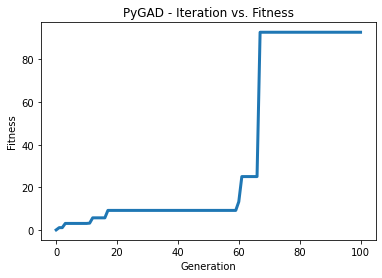

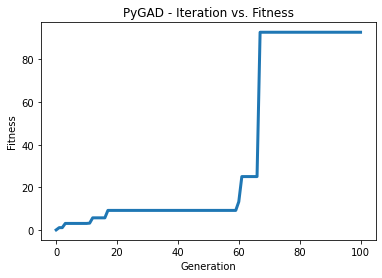

In [ ]:
#Mutation
#!pip install pygad        Uncomment for package to install
import pygad
import numpy
function_inputs = [4,-2,3.5,5]
desired_output = 44
def fitness_func(solution, solution_idx):
    output = numpy.sum(solution*function_inputs)
    fitness = 1.0 / (numpy.abs(output - desired_output) + 0.000001)
    return fitness

ga_instance = pygad.GA(num_generations=100,
                       sol_per_pop=5,
                       num_genes=4,
                       num_parents_mating=2,
                       fitness_func=fitness_func,
                       mutation_type="random")

ga_instance.run()
ga_instance.plot_result()

In [ ]:
#Fitness Function 

#initialize population
import random
best=-100000
populations =([[random.randint(0,1) for x in range(6)] for i in range(4)])
print(type(populations))
parents=[]
new_populations = []
print(populations)


def fitness_score() :
    global populations,best
    fit_value = []
    fit_score=[]
    for i in range(4) :
        chromosome_value=0
        
        for j in range(5,0,-1) :
            chromosome_value += populations[i][j]*(2**(5-j))
        chromosome_value = -1*chromosome_value if populations[i][0]==1 else chromosome_value
        print(chromosome_value)
        fit_value.append(-(chromosome_value**2) + 5 )
    print(fit_value)
    fit_value, populations = zip(*sorted(zip(fit_value, populations) , reverse = True))
    best= fit_value[0]
    
fitness_score()

<class 'list'>
[[1, 0, 1, 0, 0, 0], [1, 0, 1, 1, 1, 1], [1, 1, 1, 0, 1, 1], [1, 0, 1, 1, 1, 1]]
-8
-15
-27
-15
[-59, -220, -724, -220]
